In [ ]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
from skimage import measure

In [ ]:
import os
print(os.listdir("../data"))

In [7]:
images_train = np.load('../data/train_images.npy', encoding='latin1')
images_train = images_train[:,1]
images_train = images_train.tolist()
for i in range(len(images_train)):
    images_train[i]=images_train[i].reshape(100,100)
import csv
import string
with open('../data/train_labels.csv') as f:
    reader = csv.reader(f, delimiter=",")
    label_train = list(reader)   
del label_train[0]

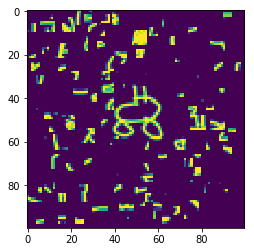

In [8]:
plt.imshow(images_train[325])

In [9]:
contour=[]
image_crop = []
for j in range(len(images_train)):
    contour.append(measure.find_contours(images_train[j],0.1))
    c=0
    for n,i in enumerate(contour[j]):
        if len(i)>c:
            c = len(i)
            idx = n
    for i in range(0,len(contour[j])):
        if i!=idx:
            ymin = int(round(min(contour[j][i][:,0])))
            xmin = int(round(min(contour[j][i][:,1])))
            ymax = int(round(max(contour[j][i][:,0])))
            xmax = int(round(max(contour[j][i][:,1])))
            images_train[j][ymin:ymax,xmin:xmax] = np.zeros(images_train[j][ymin:ymax,xmin:xmax].shape)
    ymin = int(round(min(contour[j][idx][:,0])))
    xmin = int(round(min(contour[j][idx][:,1])))
    ymax = int(round(max(contour[j][idx][:,0])))
    xmax = int(round(max(contour[j][idx][:,1])))
    image_crop.append(images_train[j][ymin+1:ymax-1,xmin+1:xmax-1])

['325', 'rollerskates']


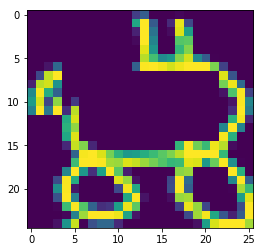

In [10]:
i=325
plt.imshow(image_crop[i])
print(label_train[i])